#### NVM2 — NVM2 TASK 1: CLASSIFICATION ANALYSIS

<ul>
<li>Ryan L. Buchanan</li>
<li>Student ID:  001826691</li>
<li>Masters Data Analytics (12/01/2020)</li>
<li>Program Mentor:  Dan Estes</li>
<li>385-432-9281 (MST)</li>
<li>rbuch49@wgu.edu</li>
</ul>

#### <span style="color:green"><b>A1. Proposal of Question</b>:</span>
Which customers are at high risk of churn?  And, which customer features/variables are most significant to churn?
This question will be answered using the K-Nearest Neighbors algorithm.

#### <span style="color:green"><b>A2. Defined Goal</b>:</span>
Stakeholders in the company will benefit by knowing, with some measure of confidence, which customers are at highest risk of churn because this will provide weight for decisions in marketing improved services to customers with these characteristics and past user experiences.

#### <span style="color:green"><b>B1. Explanation of Classification Method</b>:</span>
The algorithm stores all available cases & classifies new cases by a "majority vote" of its K-nearest neighbors. KNN will find the most similar data points in the training data. A <i>k</i> number of data points will be chosen by the model.  The dominant classes of the closest data points will suggest how a data point of interest should be classified.  Test data will then be used to test the generalizability of the models outcomes.  
<br>Expected outcomes include our test data points to be classified in accordance with their closest neighbors in hyperspace.

#### <span style="color:green"><b>B2. Summary of Method Assumption</b>:</span>
Given a specified Euclidean distance, the method assumes that the closest neighbors are similar enough to classified the data point of interest as the same <span style="color:orange">(Grant, p. 1)</span>.

#### <span style="color:green"><b>B3. Packages or Libraries List</b>:</span>
The packages or libraries I have chosen for Python include:
* Pandas
* Numpy
* Matplotlib
* Seaborn
* Scikit-learn

<br>Pandas, Numpy & Matplotlib are considered standard imports in a data science project, providing methods & statistical packages for reading, scoring & visualizing the data.  The Seaborn package provides more descriptive & visually intuitive graphs, matrices & plots.  The Scikit-learn packages efficiently implements methods for splitting, fitting, predicting & applying metrics for many machine learning models.

<br>Also, IPython Jupyter notebooks will be used to support this analysis.  Python offers very intuitive, simple & versatile programming style & syntax, as well as a large system of mature packages for data science & machine learning.  Since, Python is cross-platform, it will work well whether consumers of the analysis are using Windows PCs or a MacBook laptop.  It is fast when compared with other possible programming languages like R or MATLAB <span style="color:orange">(Massaron, p. 8)</span>.

<br>Also, there is strong support for Python as the most popular data science programming language in popular literature & media <span style="color:orange">(CBTNuggets, p. 1)</span>.

#### <span style="color:green"><b>C1. Data Preprocessing</b>:</span>
Many of the features that will be used are binary (yes/no) variables must be accordingly encoded with dummy variables (1/0). 

#### <span style="color:green"><b>C2. Dataset Variables</b>:</span>
Initial dataset variables used to perform the analysis for the classification analysis identified & classified as continuous or categorical below.

#### <span style="color:green"><b>C3. Steps for Analysis</b>:</span>
The steps used to prepare the dataset will include:
<br>&ensp; 1. Back up my data and the process I am following as a copy to my machine and, since this is a manageable dataset, to GitHub using command line and gitbash.
<br>&ensp; 2. Read the data set into Python using Pandas' read_csv command.
<br>&ensp; 3. Evaluate the data struture to better understand input data using info & describe methods.
<br>&ensp; 4. Naming the dataset as a the variable "churn_df" & subsequent useful slices of the dataframe as "df".
<br>&ensp; 5. Examine potential misspellings, awkward variable naming & missing data.
<br>&ensp; 6. Explore descriptive statistics for outliers that may create or hide statistical significance using histograms & box plots.
<br>&ensp; 7. Where necessary, impute records missing data with meaningful measures of central tendency (mean, median or mode) or simply remove outliers that are several standard deviations above the mean.
<br>&ensp; 8. Remove less meaningful categorical variables from dataset to provide fully numerical dataframe for further analysis.
<br>&ensp; 9. Extract cleaned dataset as "churn_df_prepared.csv" for use in K-Nearest Neighbor model.

Most relevant to our decision making process is the <b>dependent variable</b> of "Churn" which is binary categorical with only two values, "Yes" or "No".  "Churn" will be our <b>categorical target variable</b>. 

<br>In cleaning the data, we may discover relevance of the <b>continuous predictor variables</b>: 
* Children
* Income
* Outage_sec_perweek
* Email
* Contacts    
* Yearly_equip_failure
* Tenure (the number of months the customer has stayed with the provider)
* MonthlyCharge
* Bandwidth_GB_Year    
    
<br>Likewise, we may discover relevance of the <b>categorical predictor variables</b> (all binary categorical with only two values, "Yes" or "No", except where noted) The following will be encoded as dummy variables with 1/0: 
* Techie: Whether the customer considers themselves technically inclined (based on
customer questionnaire when they signed up for services) (yes, no)
* Contract: The contract term of the customer (month-to-month, one year, two year)
* Port_modem: Whether the customer has a portable modem (yes, no)
* Tablet: Whether the customer owns a tablet such as iPad, Surface, etc. (yes, no)
* InternetService: Customer’s internet service provider (DSL, fiber optic, None)
* Phone: Whether the customer has a phone service (yes, no)
* Multiple: Whether the customer has multiple lines (yes, no)
* OnlineSecurity: Whether the customer has an online security add-on (yes, no)
* OnlineBackup: Whether the customer has an online backup add-on (yes, no)
* DeviceProtection: Whether the customer has device protection add-on (yes, no)
* TechSupport: Whether the customer has a technical support add-on (yes, no)
* StreamingTV: Whether the customer has streaming TV (yes, no)
* StreamingMovies: Whether the customer has streaming movies (yes, no)
    
<br>Finally, <b>discrete ordinal predictor variables</b> from the survey responses from customers regarding various customer service features may be relevant in the decision-making process. In the surveys, customers provided ordinal numerical data by rating 8 customer service factors on a scale of 1 to 8 (1 = most important, 8 = least important): 
    
* Item1: Timely response
* Item2: Timely fixes
* Item3: Timely replacements
* Item4: Reliability
* Item5: Options
* Item6: Respectful response
* Item7: Courteous exchange
* Item8: Evidence of active listening


In [1]:
# Standard data science imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Scikit-learn
import sklearn
from sklearn import datasets
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
# Change color of Matplotlib font
import matplotlib as mpl

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

In [3]:
# Increase Jupyter display cell-width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [4]:
# Ignore Warning Code
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Load data set into Pandas dataframe
churn_df = pd.read_csv('data/churn_clean.csv', index_col=0)

In [6]:
# Examine the features of the dataset
churn_df.columns

Index(['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip',
       'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children',
       'Age', 'Income', 'Marital', 'Gender', 'Churn', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Techie', 'Contract',
       'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod',
       'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Item1', 'Item2',
       'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'],
      dtype='object')

In [7]:
# Get an idea of dataset size
churn_df.shape

(10000, 49)

In [8]:
# Examine first few records of dataset
churn_df.head()

Customer_id                           Interaction  \
CaseOrder                                                     
1             K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
2             S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
3             K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
4              D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
5             K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                        UID         City State  \
CaseOrder                                                        
1          e885b299883d4f9fb18e39c75155d990  Point Baker    AK   
2          f2de8bef964785f41a2959829830fb8a  West Branch    MI   
3          f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR   
4          dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA   
5          aabb64a116e83fdc4befc1fbab1663f9    Needville    TX   

                          County    Zip       Lat        Lng  Population  ...  \
CaseOrder                                                                 ...   
1          Prince of Wales-Hyder  99927  56.25100 -133.37571          38  ...   
2                         Ogemaw  48661  44.32893  -84.24080       10446  ...   
3                        Yamhill  97148  45.35589 -123.24657        3735  ...   
4                      San Diego  92014  32.96687 -117.24798       13863  ...   
5                      Fort Bend  77461  29.38012  -95.80673       11352  ...   

          MonthlyCharge Bandwidth_GB_Year Item1  Item2  Item3  Item4 Item5  \
CaseOrder                                                                    
1            172.455519        904.536110     5      5      5      3     4   
2            242.632554        800.982766     3      4      3      3     4   
3            159.947583       2054.706961     4      4      2      4     4   
4            119.956840       2164.579412     4      4      4      2     5   
5            149.948316        271.493436     4      4      4      3     4   

          Item6 Item7  Item8  
CaseOrder                     
1             4     3      4  
2             3     4      4  
3             3     3      3  
4             4     3      3  
5             4     4      5  

[5 rows x 49 columns]

In [9]:
# View DataFrame info
churn_df.info

<bound method DataFrame.info of           Customer_id                           Interaction  \
CaseOrder                                                     
1             K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
2             S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
3             K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
4              D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
5             K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...               ...                                   ...   
9996          M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9997          D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9998          I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9999          I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
10000          T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

                                        UID          City State  \
CaseOrder                                                         
1          e88

In [10]:
# Provide an initial look at extant dataset
churn_df.head()

Customer_id                           Interaction  \
CaseOrder                                                     
1             K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
2             S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
3             K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
4              D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
5             K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                        UID         City State  \
CaseOrder                                                        
1          e885b299883d4f9fb18e39c75155d990  Point Baker    AK   
2          f2de8bef964785f41a2959829830fb8a  West Branch    MI   
3          f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR   
4          dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA   
5          aabb64a116e83fdc4befc1fbab1663f9    Needville    TX   

                          County    Zip       Lat        Lng  Population  ...  \
CaseOrder                                                                 ...   
1          Prince of Wales-Hyder  99927  56.25100 -133.37571          38  ...   
2                         Ogemaw  48661  44.32893  -84.24080       10446  ...   
3                        Yamhill  97148  45.35589 -123.24657        3735  ...   
4                      San Diego  92014  32.96687 -117.24798       13863  ...   
5                      Fort Bend  77461  29.38012  -95.80673       11352  ...   

          MonthlyCharge Bandwidth_GB_Year Item1  Item2  Item3  Item4 Item5  \
CaseOrder                                                                    
1            172.455519        904.536110     5      5      5      3     4   
2            242.632554        800.982766     3      4      3      3     4   
3            159.947583       2054.706961     4      4      2      4     4   
4            119.956840       2164.579412     4      4      4      2     5   
5            149.948316        271.493436     4      4      4      3     4   

          Item6 Item7  Item8  
CaseOrder                     
1             4     3      4  
2             3     4      4  
3             3     3      3  
4             4     3      3  
5             4     4      5  

[5 rows x 49 columns]

In [11]:
# Get an overview of descriptive statistics
churn_df.describe()

Zip           Lat           Lng     Population    Children  \
count  10000.000000  10000.000000  10000.000000   10000.000000  10000.0000   
mean   49153.319600     38.757567    -90.782536    9756.562400      2.0877   
std    27532.196108      5.437389     15.156142   14432.698671      2.1472   
min      601.000000     17.966120   -171.688150       0.000000      0.0000   
25%    26292.500000     35.341828    -97.082813     738.000000      0.0000   
50%    48869.500000     39.395800    -87.918800    2910.500000      1.0000   
75%    71866.500000     42.106908    -80.088745   13168.000000      3.0000   
max    99929.000000     70.640660    -65.667850  111850.000000     10.0000   

                Age         Income  Outage_sec_perweek         Email  \
count  10000.000000   10000.000000        10000.000000  10000.000000   
mean      53.078400   39806.926771           10.001848     12.016000   
std       20.698882   28199.916702            2.976019      3.025898   
min       18.000000     348.670000            0.099747      1.000000   
25%       35.000000   19224.717500            8.018214     10.000000   
50%       53.000000   33170.605000           10.018560     12.000000   
75%       71.000000   53246.170000           11.969485     14.000000   
max       89.000000  258900.700000           21.207230     23.000000   

           Contacts  ...  MonthlyCharge  Bandwidth_GB_Year         Item1  \
count  10000.000000  ...   10000.000000       10000.000000  10000.000000   
mean       0.994200  ...     172.624816        3392.341550      3.490800   
std        0.988466  ...      42.943094        2185.294852      1.037797   
min        0.000000  ...      79.978860         155.506715      1.000000   
25%        0.000000  ...     139.979239        1236.470827      3.000000   
50%        1.000000  ...     167.484700        3279.536903      3.000000   
75%        2.000000  ...     200.734725        5586.141369      4.000000   
max        7.000000  ...     290.160419        7158.981530      7.000000   

              Item2         Item3         Item4         Item5         Item6  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       3.505100      3.487000      3.497500      3.492900      3.497300   
std        1.034641      1.027977      1.025816      1.024819      1.033586   
min        1.000000      1.000000      1.000000      1.000000      1.000000   
25%        3.000000      3.000000      3.000000      3.000000      3.000000   
50%        4.000000      3.000000      3.000000      3.000000      3.000000   
75%        4.000000      4.000000      4.000000      4.000000      4.000000   
max        7.000000      8.000000      7.000000      7.000000      8.000000   

              Item7         Item8  
count  10000.000000  10000.000000  
mean       3.509500      3.495600  
std        1.028502      1.028633  
min        1.000000      1.000000  
25%        3.000000      3.000000  
50%        4.000000      3.000000  
75%        4.000000      4.000000  
max        7.000000      8.000000  

[8 rows x 22 columns]

In [12]:
# Get data types of features
churn_df.dtypes

Customer_id              object
Interaction              object
UID                      object
City                     object
State                    object
County                   object
Zip                       int64
Lat                     float64
Lng                     float64
Population                int64
Area                     object
TimeZone                 object
Job                      object
Children                  int64
Age                       int64
Income                  float64
Marital                  object
Gender                   object
Churn                    object
Outage_sec_perweek      float64
Email                     int64
Contacts                  int64
Yearly_equip_failure      int64
Techie                   object
Contract                 object
Port_modem               object
Tablet                   object
InternetService          object
Phone                    object
Multiple                 object
OnlineSecurity           object
OnlineBa

In [13]:
# Rename last 8 survey columns for better description of variables
churn_df.rename(columns = {'Item1':'TimelyResponse', 
                    'Item2':'Fixes', 
                     'Item3':'Replacements', 
                     'Item4':'Reliability', 
                     'Item5':'Options', 
                     'Item6':'Respectfulness', 
                     'Item7':'Courteous', 
                     'Item8':'Listening'}, 
          inplace=True)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


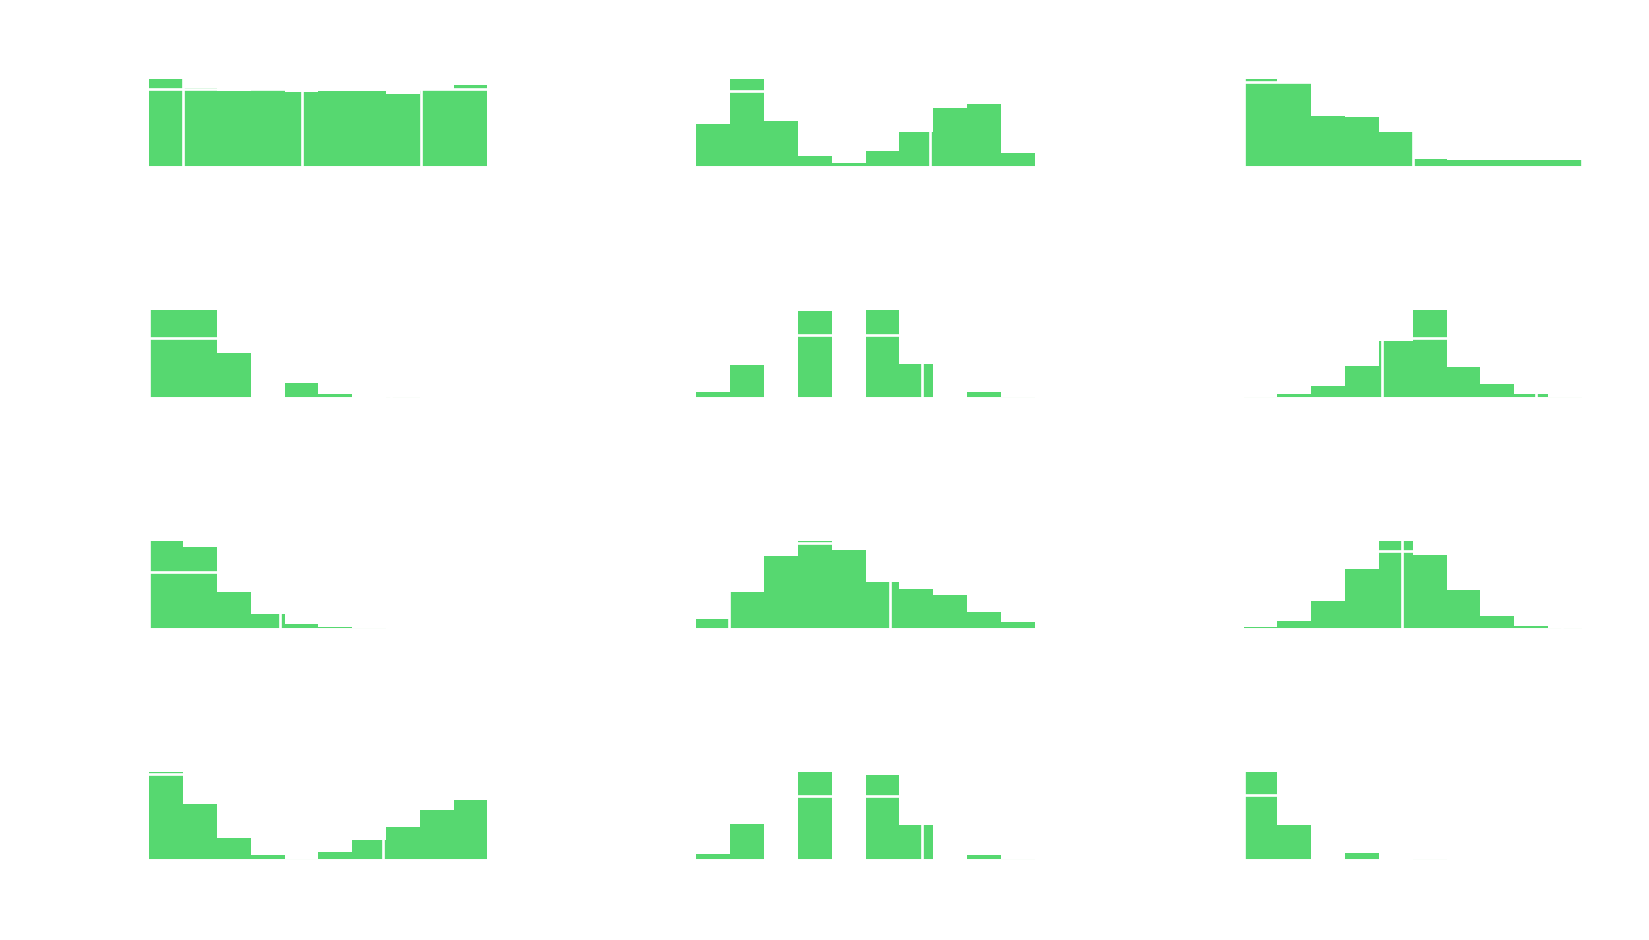

In [14]:
# Create histograms of contiuous variables & categorical variables
churn_df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 
          'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 
          'Bandwidth_GB_Year', 'TimelyResponse', 'Courteous']].hist()
plt.savefig('churn_pyplot.jpg')
plt.tight_layout()

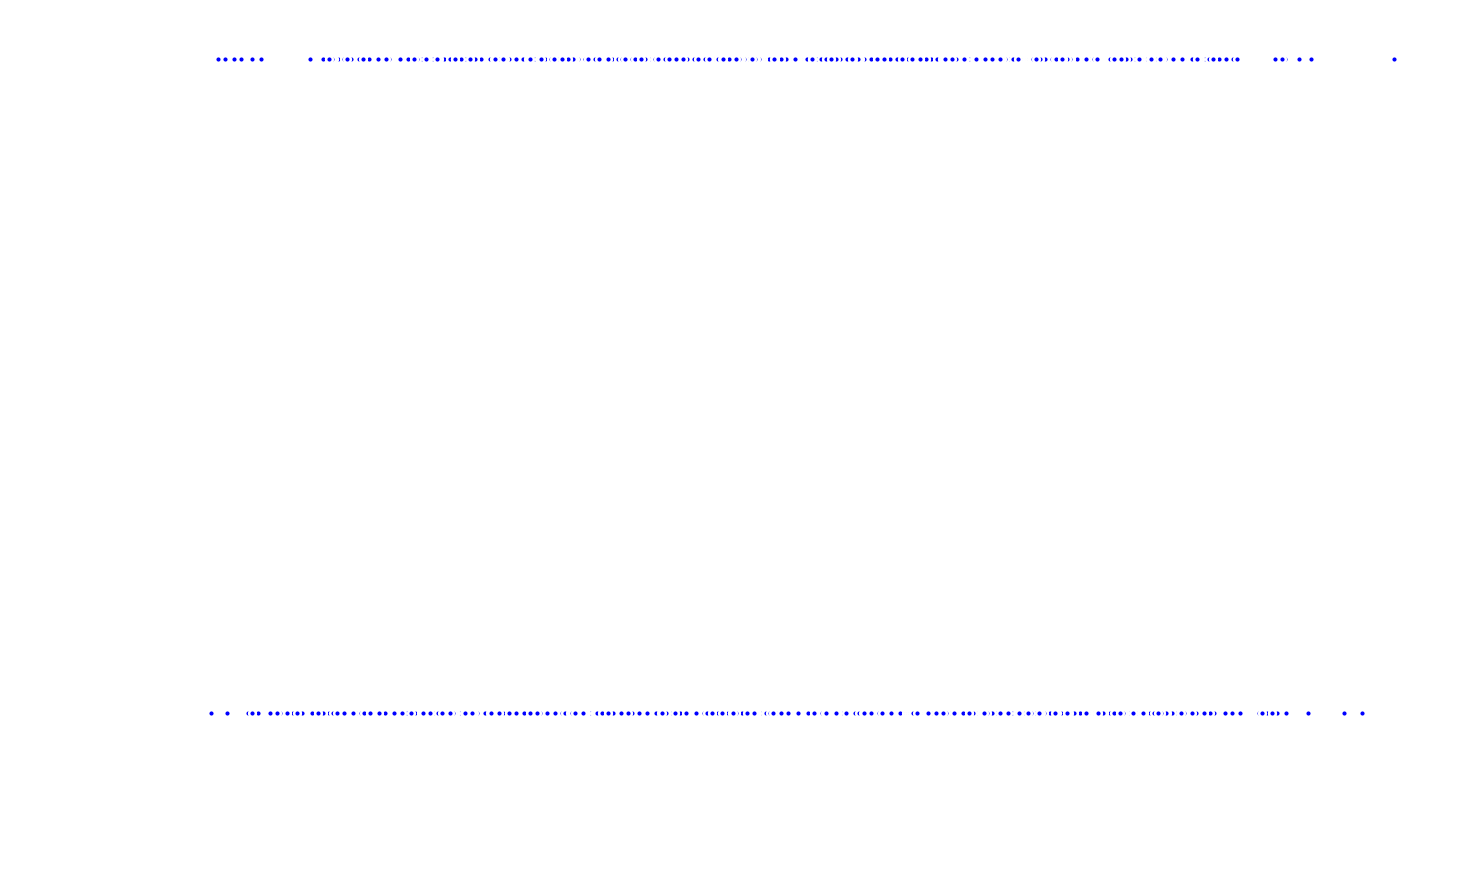

In [15]:
# Create a scatterplot to get an idea of correlations between potentially related variables
sns.scatterplot(x=churn_df['Outage_sec_perweek'], y=churn_df['Churn'], color='blue')
plt.show();

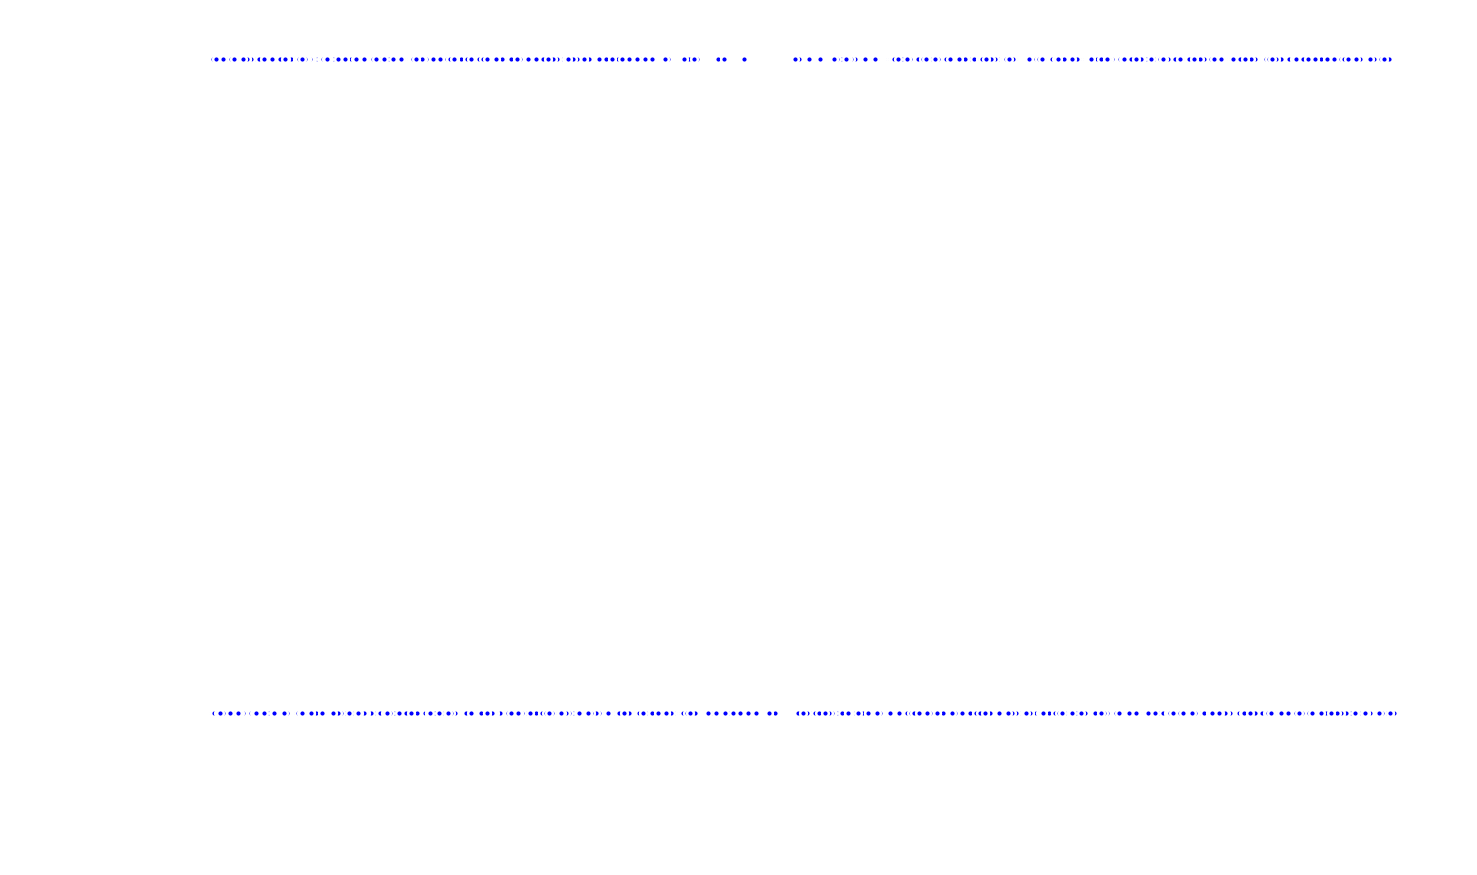

In [16]:
# Create a scatterplot to get an idea of correlations between potentially related variables
sns.scatterplot(x=churn_df['Tenure'], y=churn_df['Churn'], color='blue')
plt.show();

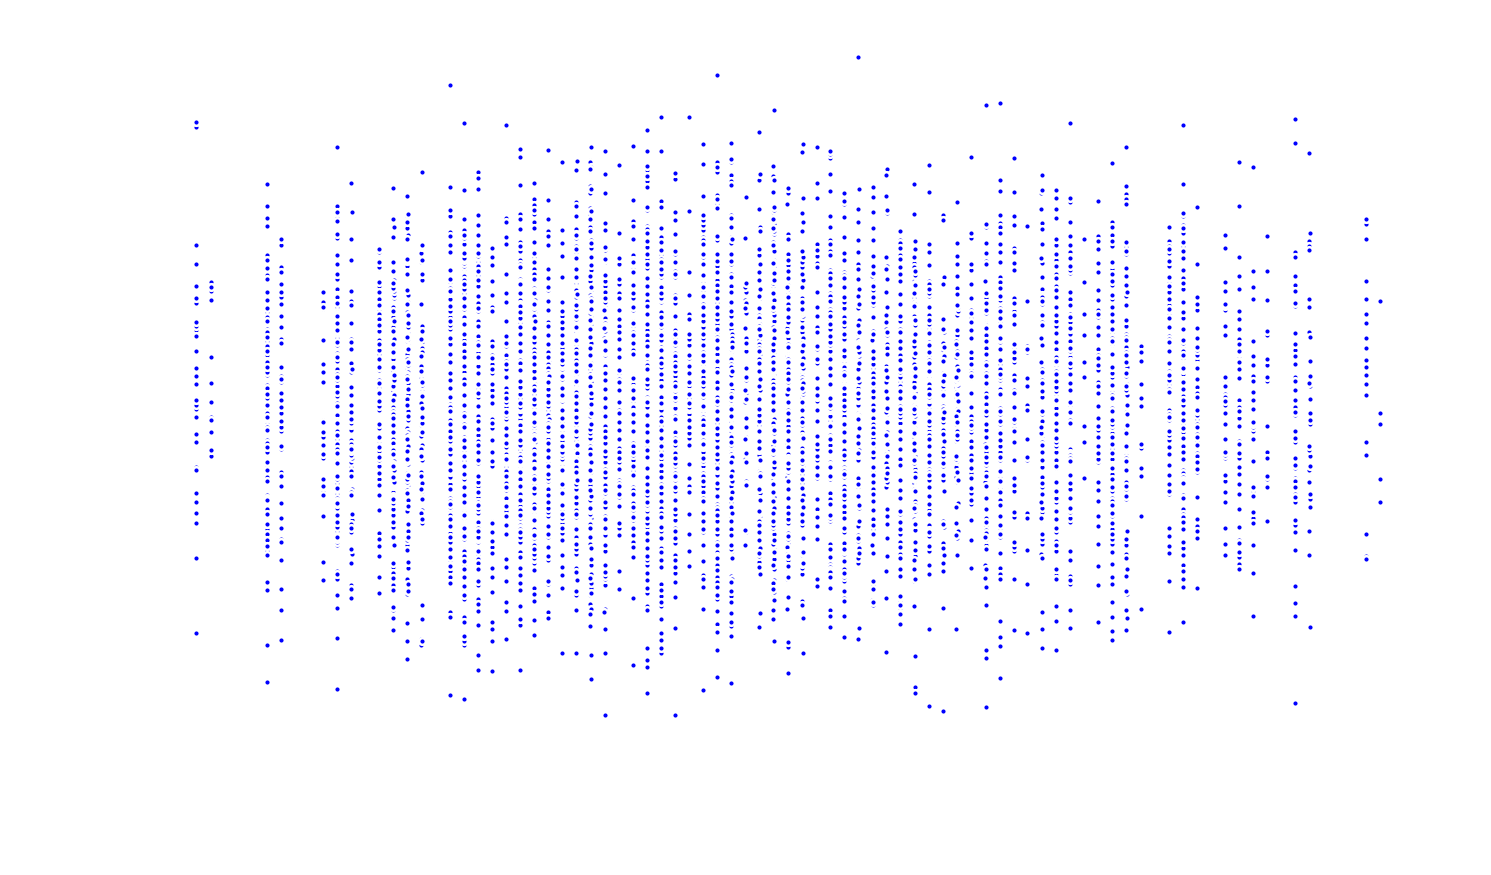

In [17]:
# Create a scatterplot to get an idea of correlations between potentially related variables
sns.scatterplot(x=churn_df['MonthlyCharge'], y=churn_df['Outage_sec_perweek'], color='blue')
plt.show();

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


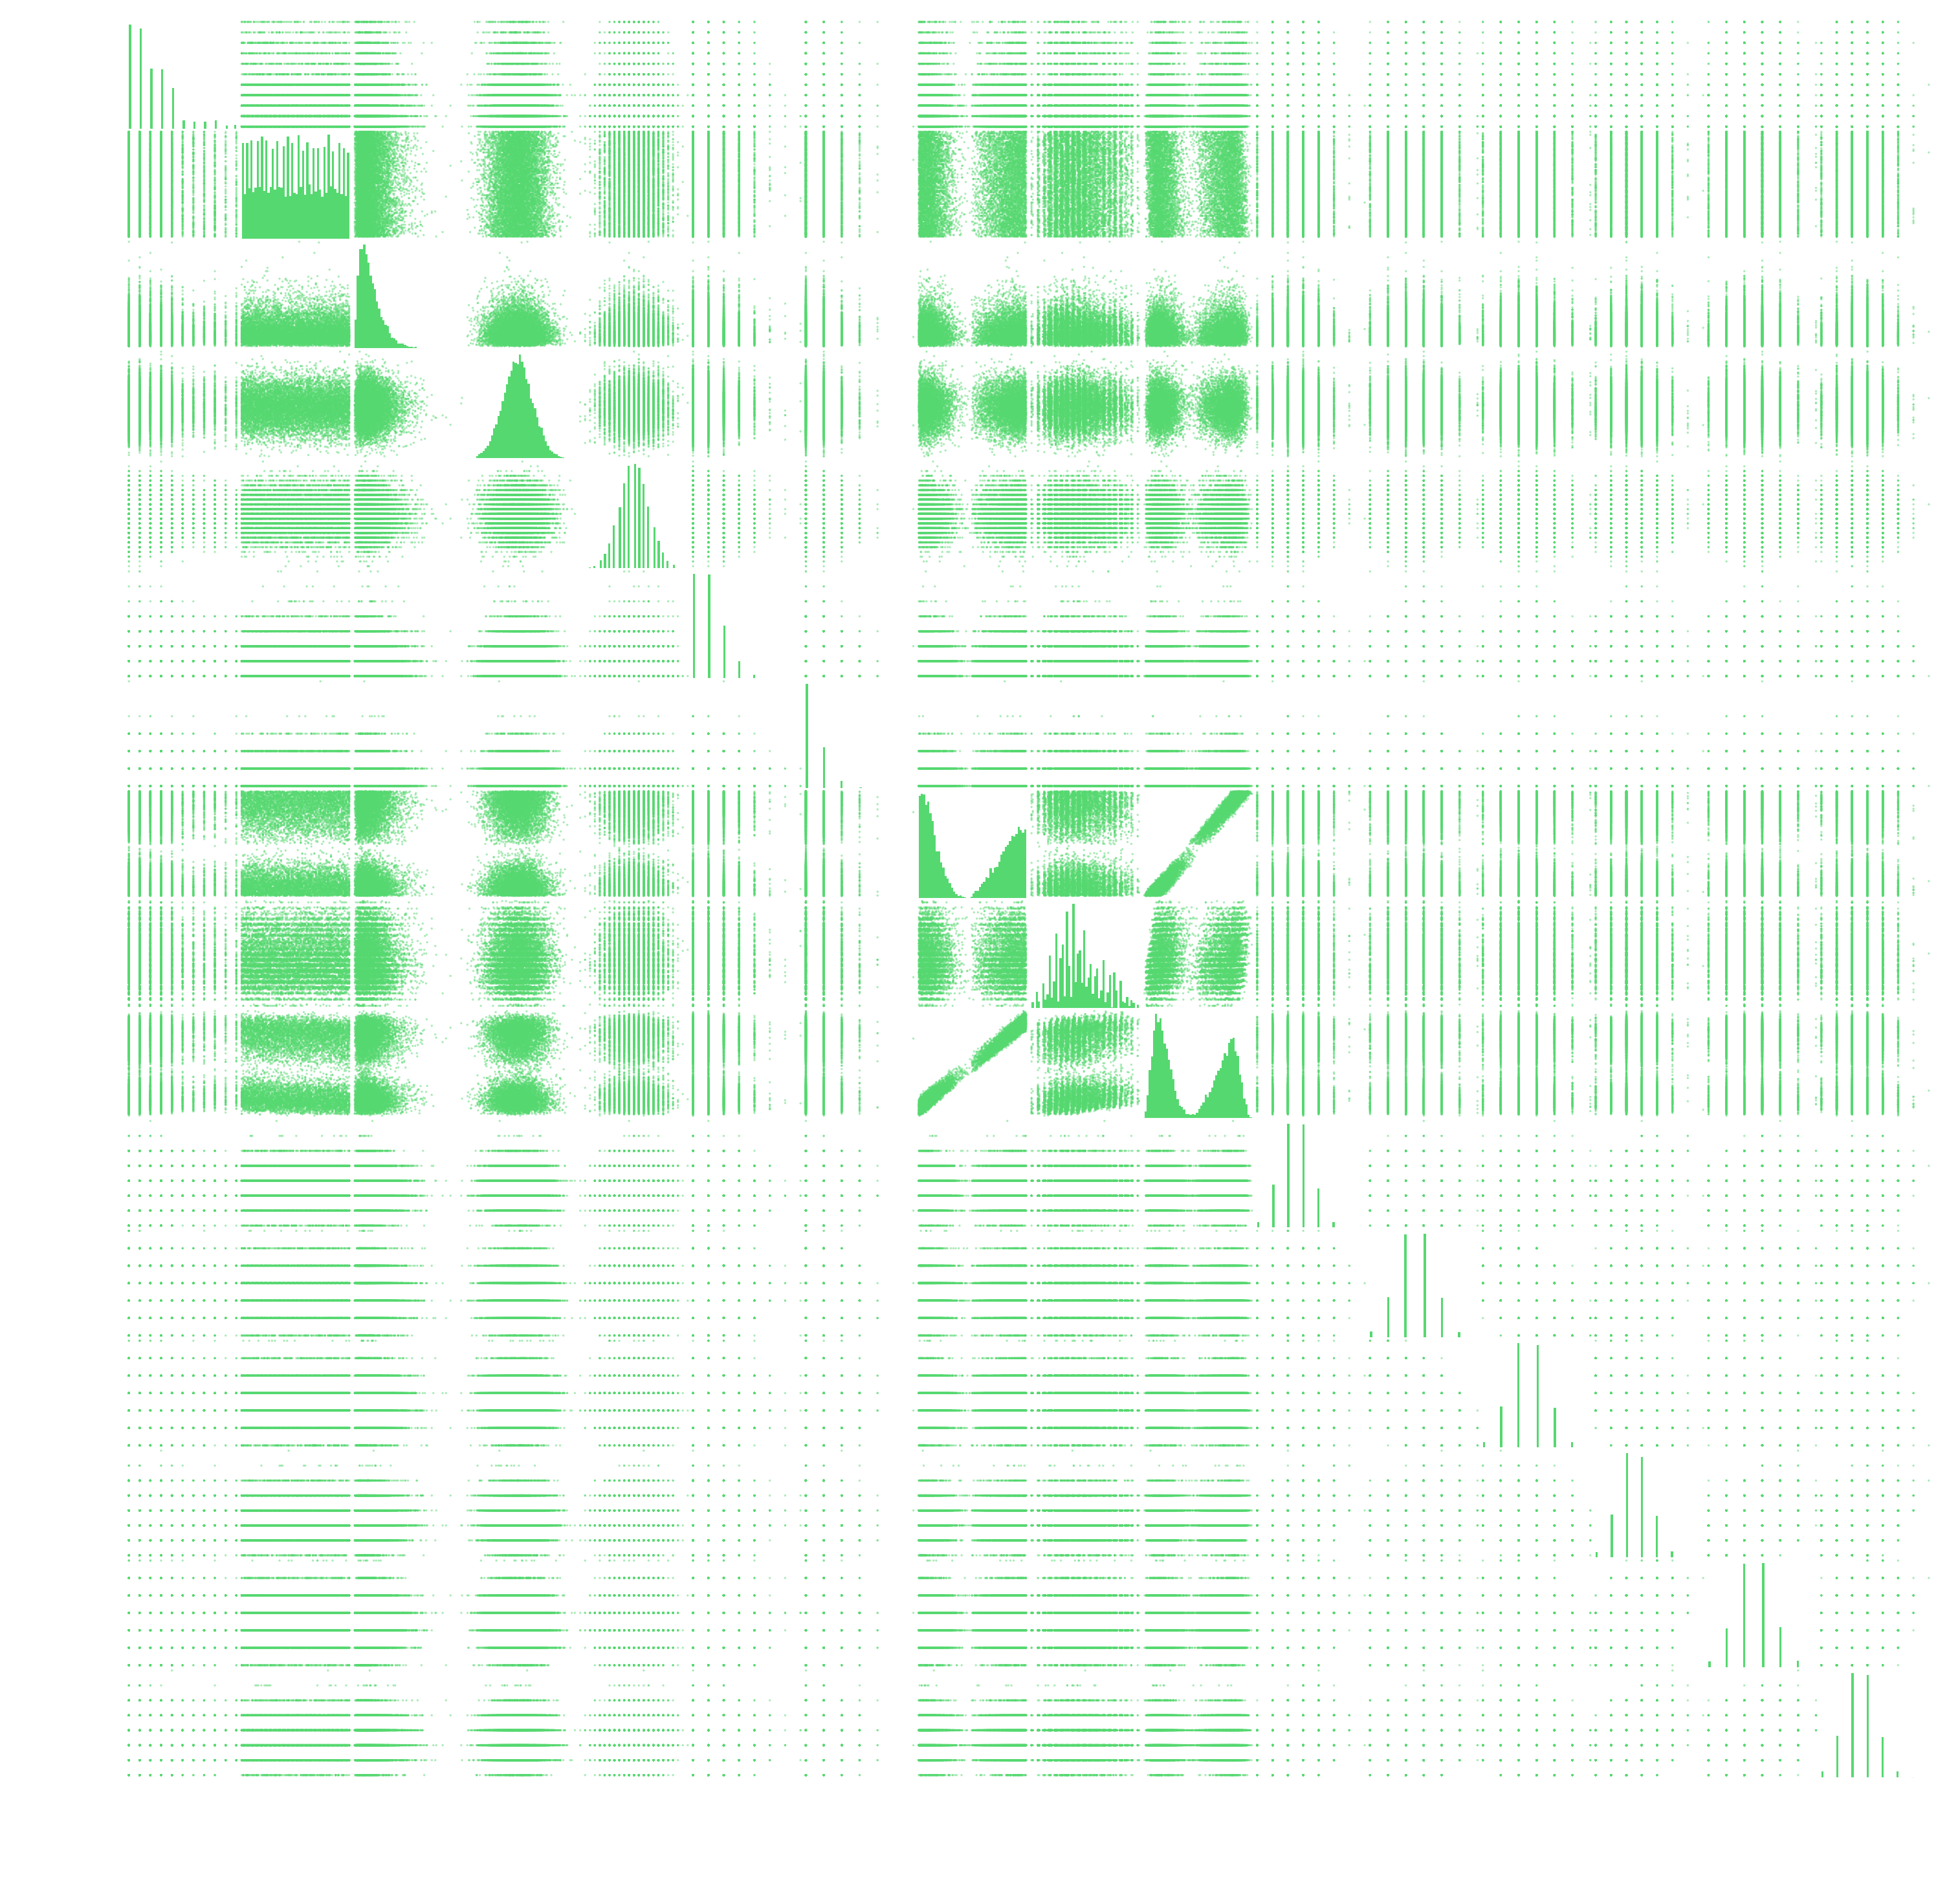

In [18]:
# Provide a scatter matrix of numeric variables for high level overview of potential relationships & distributions
churn_numeric = churn_df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 
                          'Email', 'Contacts','Yearly_equip_failure', 'Tenure', 
                          'MonthlyCharge', 'Bandwidth_GB_Year', 'Replacements', 
                          'Reliability', 'Options', 'Respectfulness', 'Courteous', 
                          'Listening']]

pd.plotting.scatter_matrix(churn_numeric, figsize = [15, 15]);

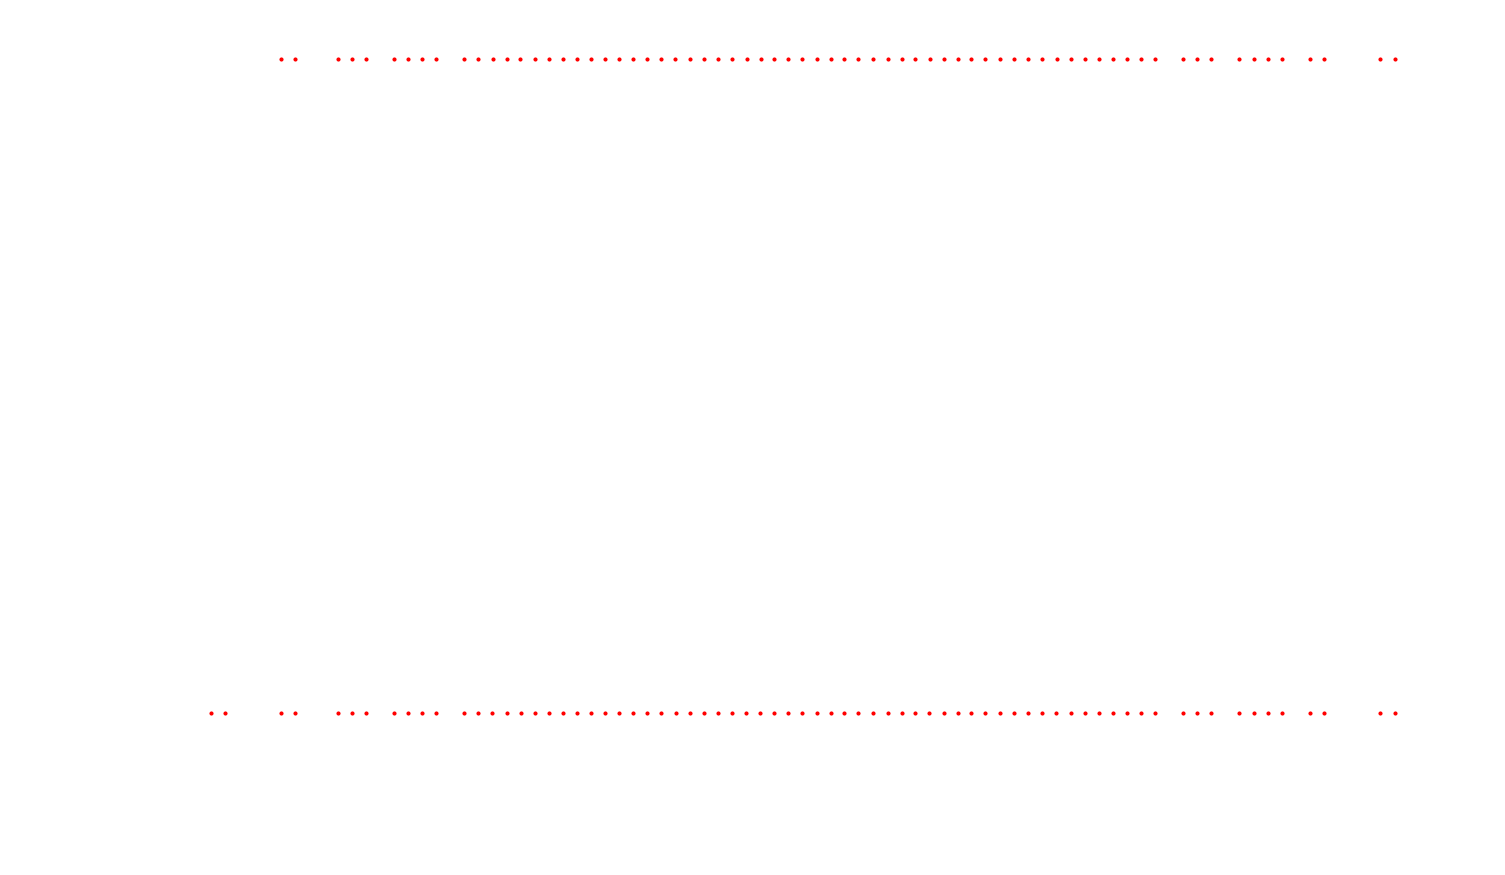

In [19]:
# Create individual scatterplot for viewing relationship of key financial featurte against target variable
sns.scatterplot(x = churn_df['MonthlyCharge'], y = churn_df['Churn'], color='red')
plt.show();

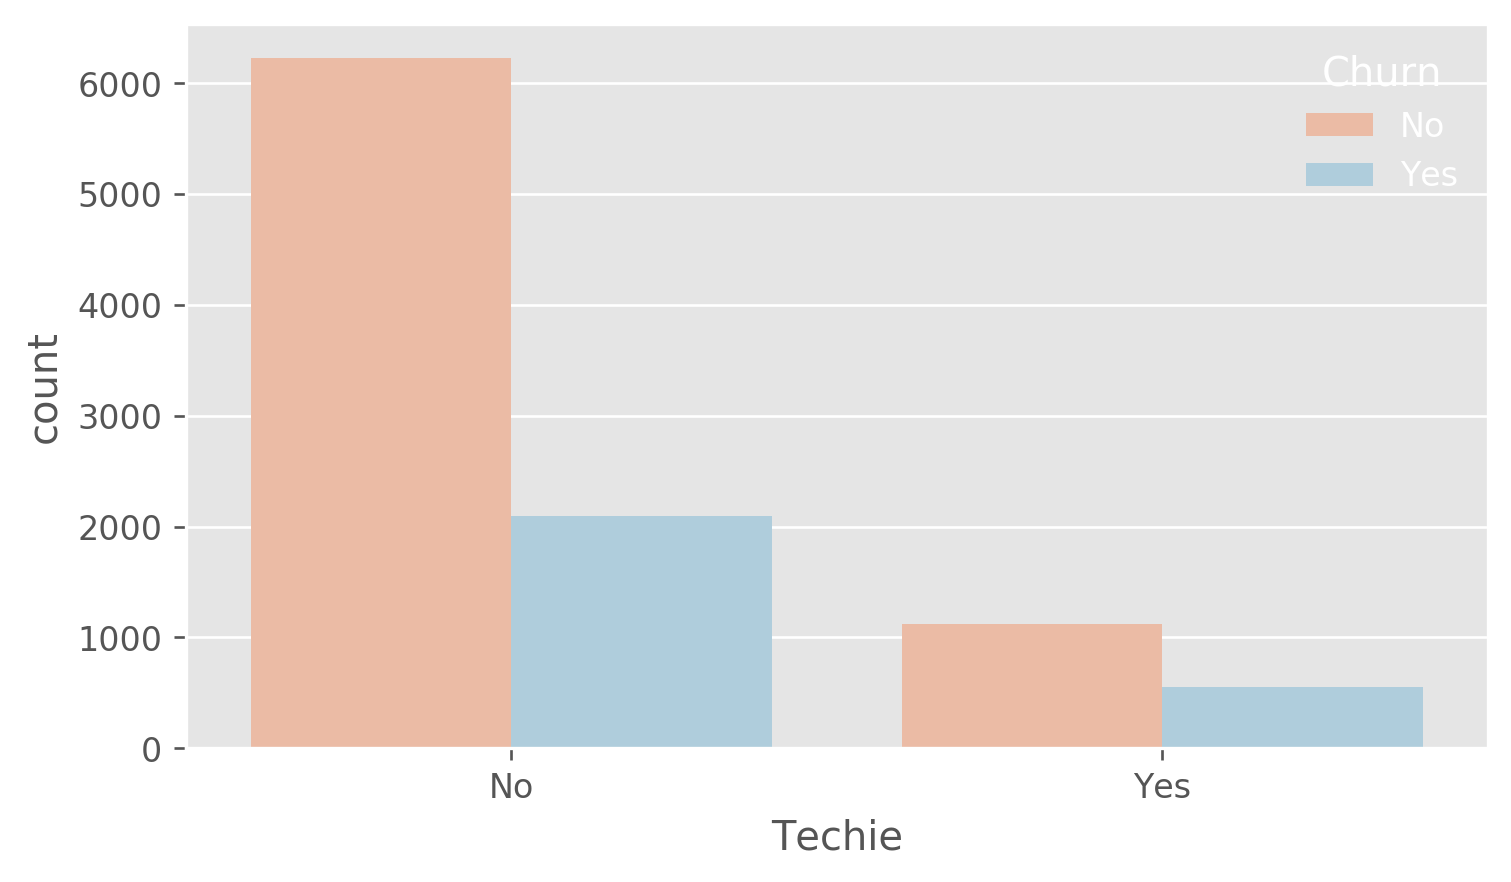

In [20]:
# Set plot style to ggplot for aesthetics & R style
plt.style.use('ggplot')

# Countplot more useful than scatter_matrix when features of dataset are binary
plt.figure()
sns.countplot(x='Techie', hue='Churn', data=churn_df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

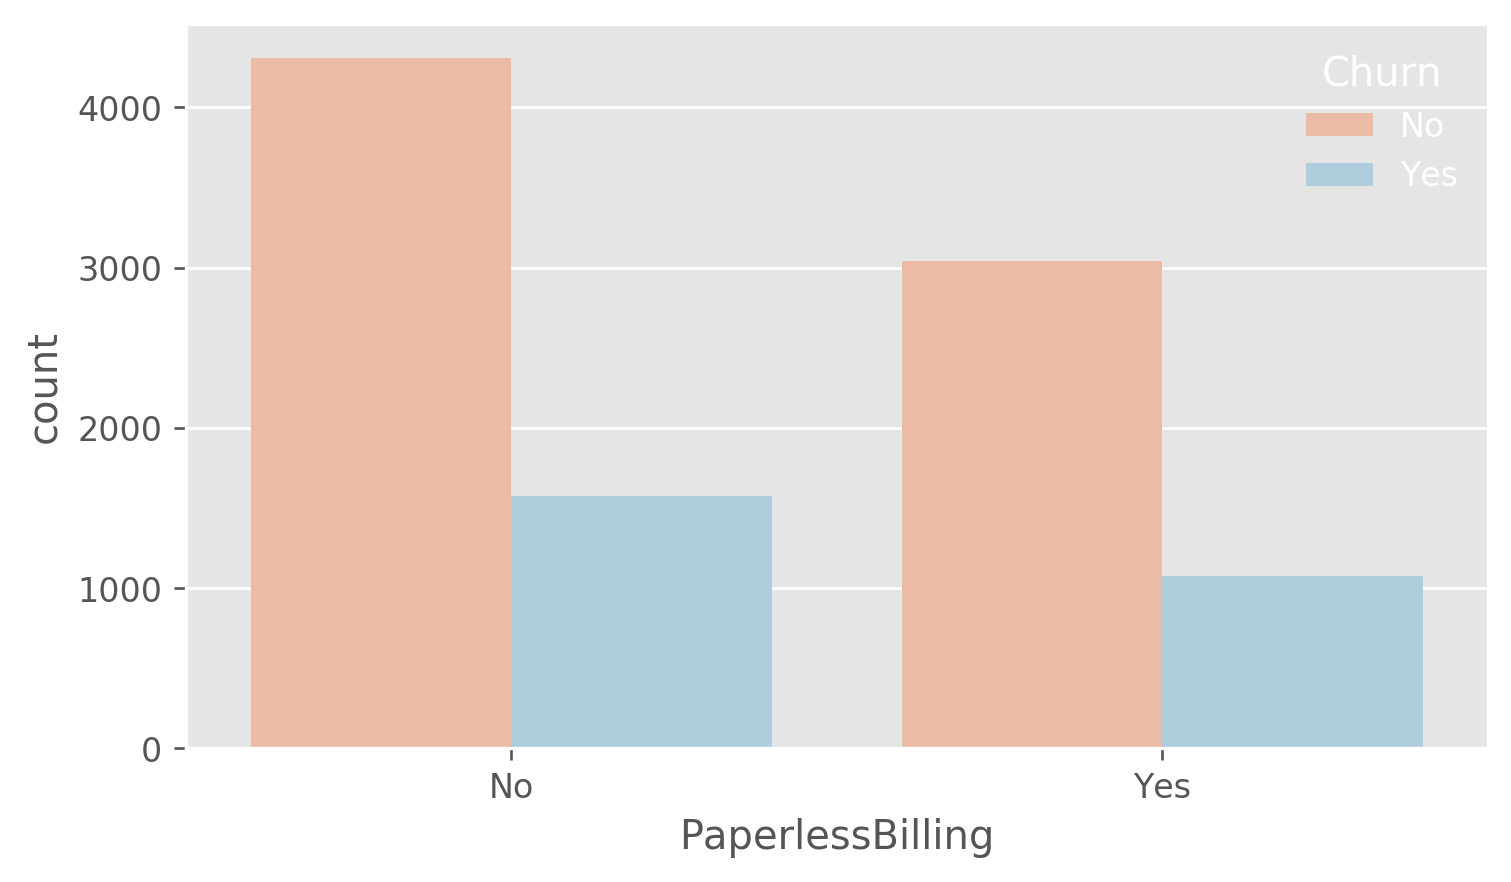

In [21]:
# Countplot more useful than scatter_matrix when features of dataset are binary
plt.figure()
sns.countplot(x='PaperlessBilling', hue='Churn', data=churn_df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

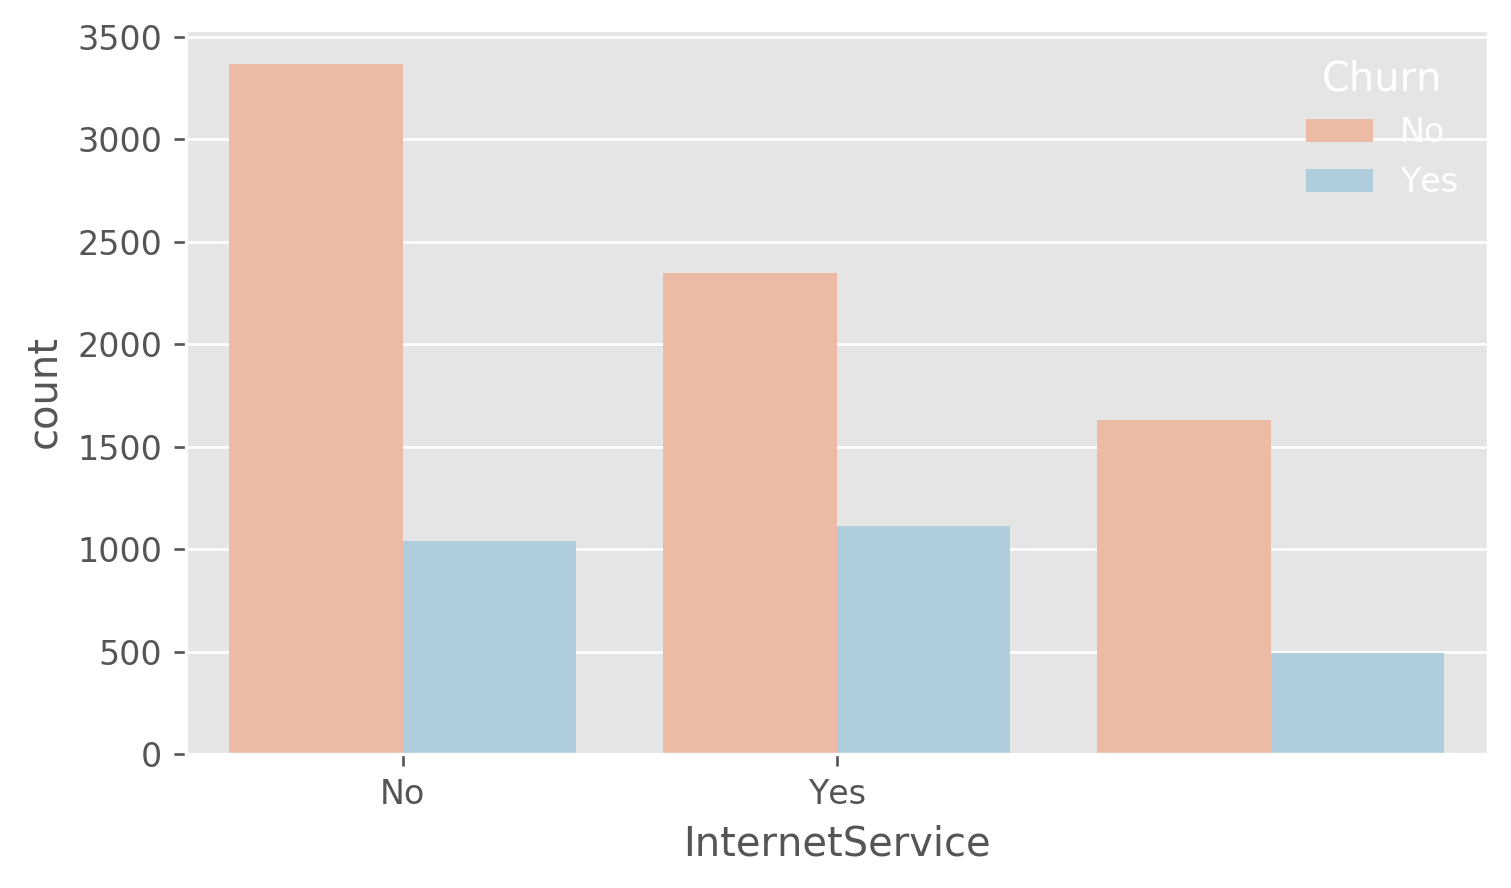

In [22]:
# Countplot more useful than scatter_matrix when features of dataset are binary
plt.figure()
sns.countplot(x='InternetService', hue='Churn', data=churn_df, palette='RdBu')
plt.xticks([0,1], ['No', 'Yes'])
plt.show()

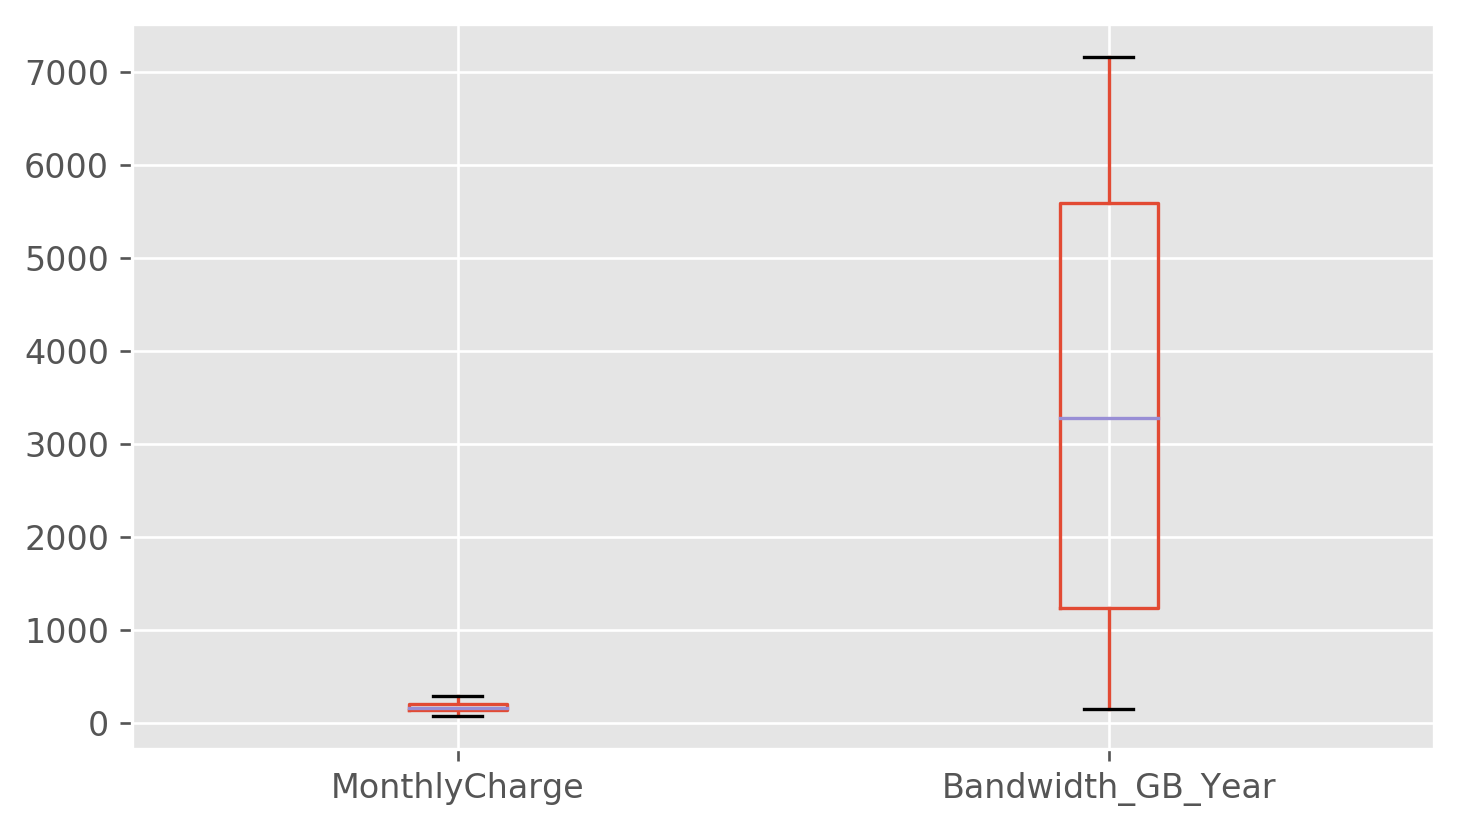

In [23]:
# Create multiple boxplots for continuous & categorical variables
churn_df.boxplot(column=['MonthlyCharge','Bandwidth_GB_Year'])

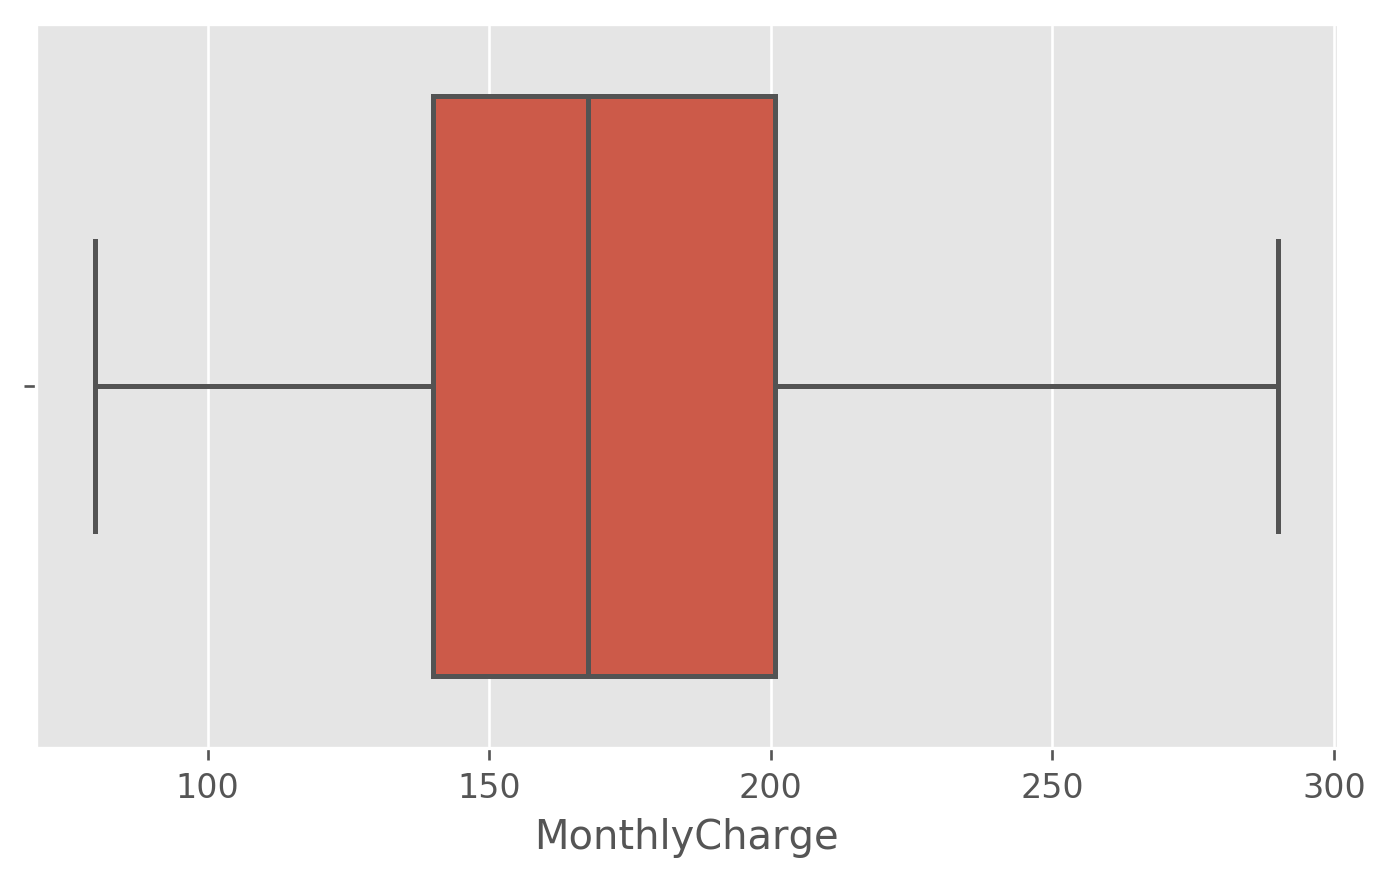

In [24]:
# Create Seaborn boxplots for continuous & categorical variables
sns.boxplot('MonthlyCharge', data = churn_df)
plt.show()

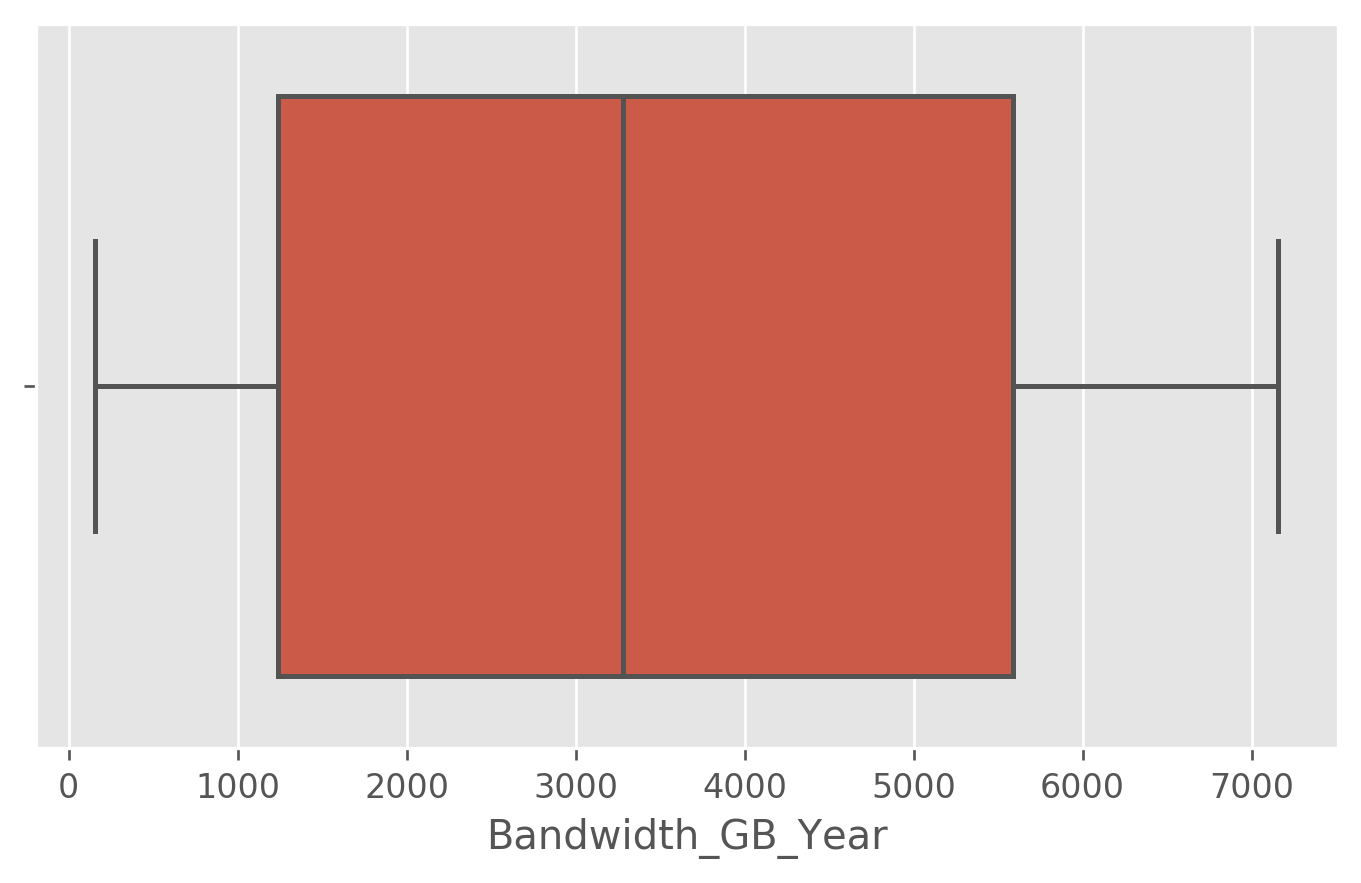

In [25]:
# Create Seaborn boxplots for continuous & categorical variables
sns.boxplot('Bandwidth_GB_Year', data = churn_df)
plt.show()

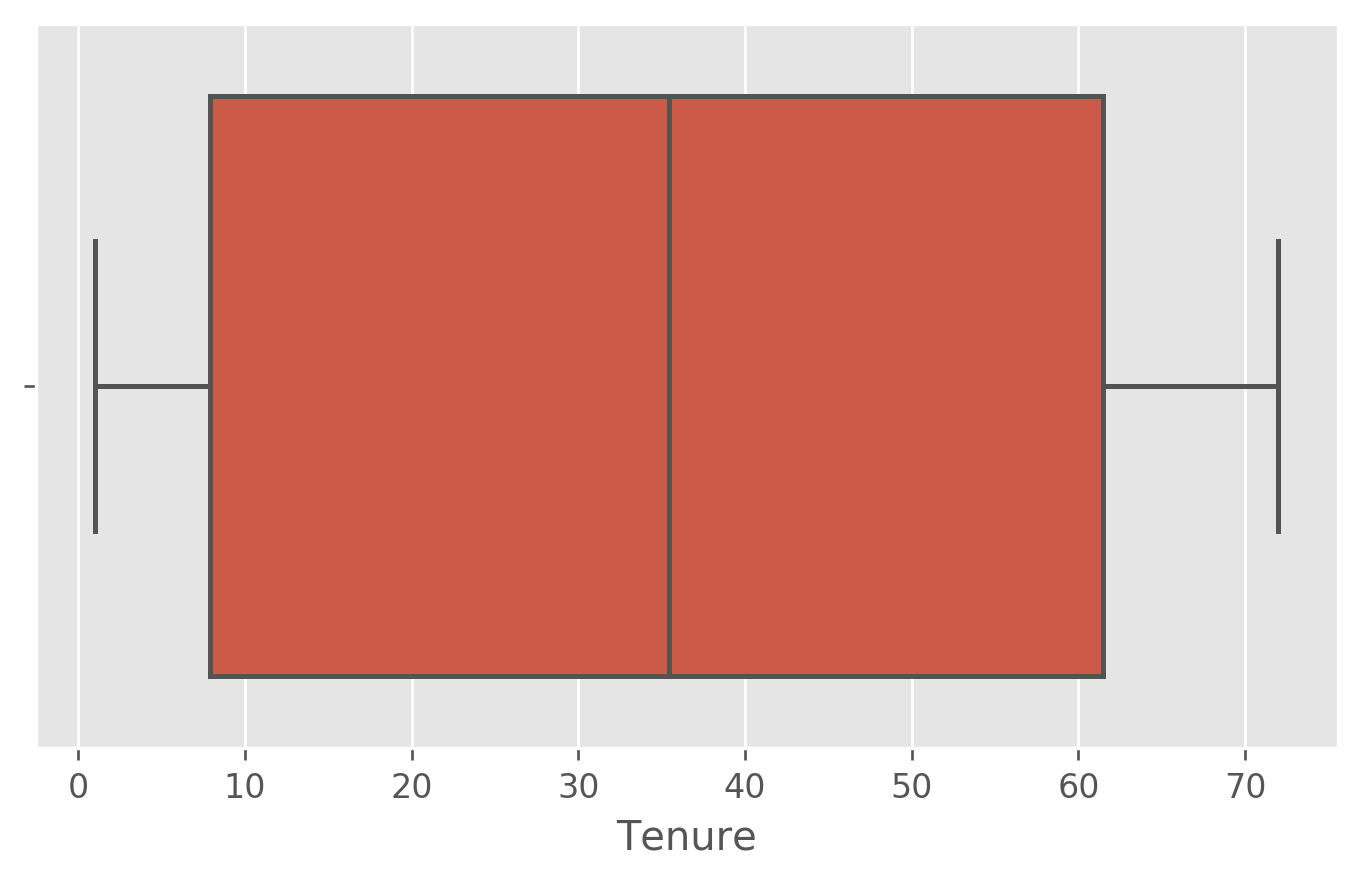

In [26]:
# Create Seaborn boxplots for continuous variables
sns.boxplot('Tenure', data = churn_df)
plt.show()

#### Anomalies
It appears that anomolies have been removed from the supplied dataset, churn_clean.csv. &nbsp; There are no remaining outliers.

In [27]:
# Discover missing data points within dataset
data_nulls = churn_df.isnull().sum()
print(data_nulls)

Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMethod           0
Tenure      

'(GeeksForGeeks, p. 1)'

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


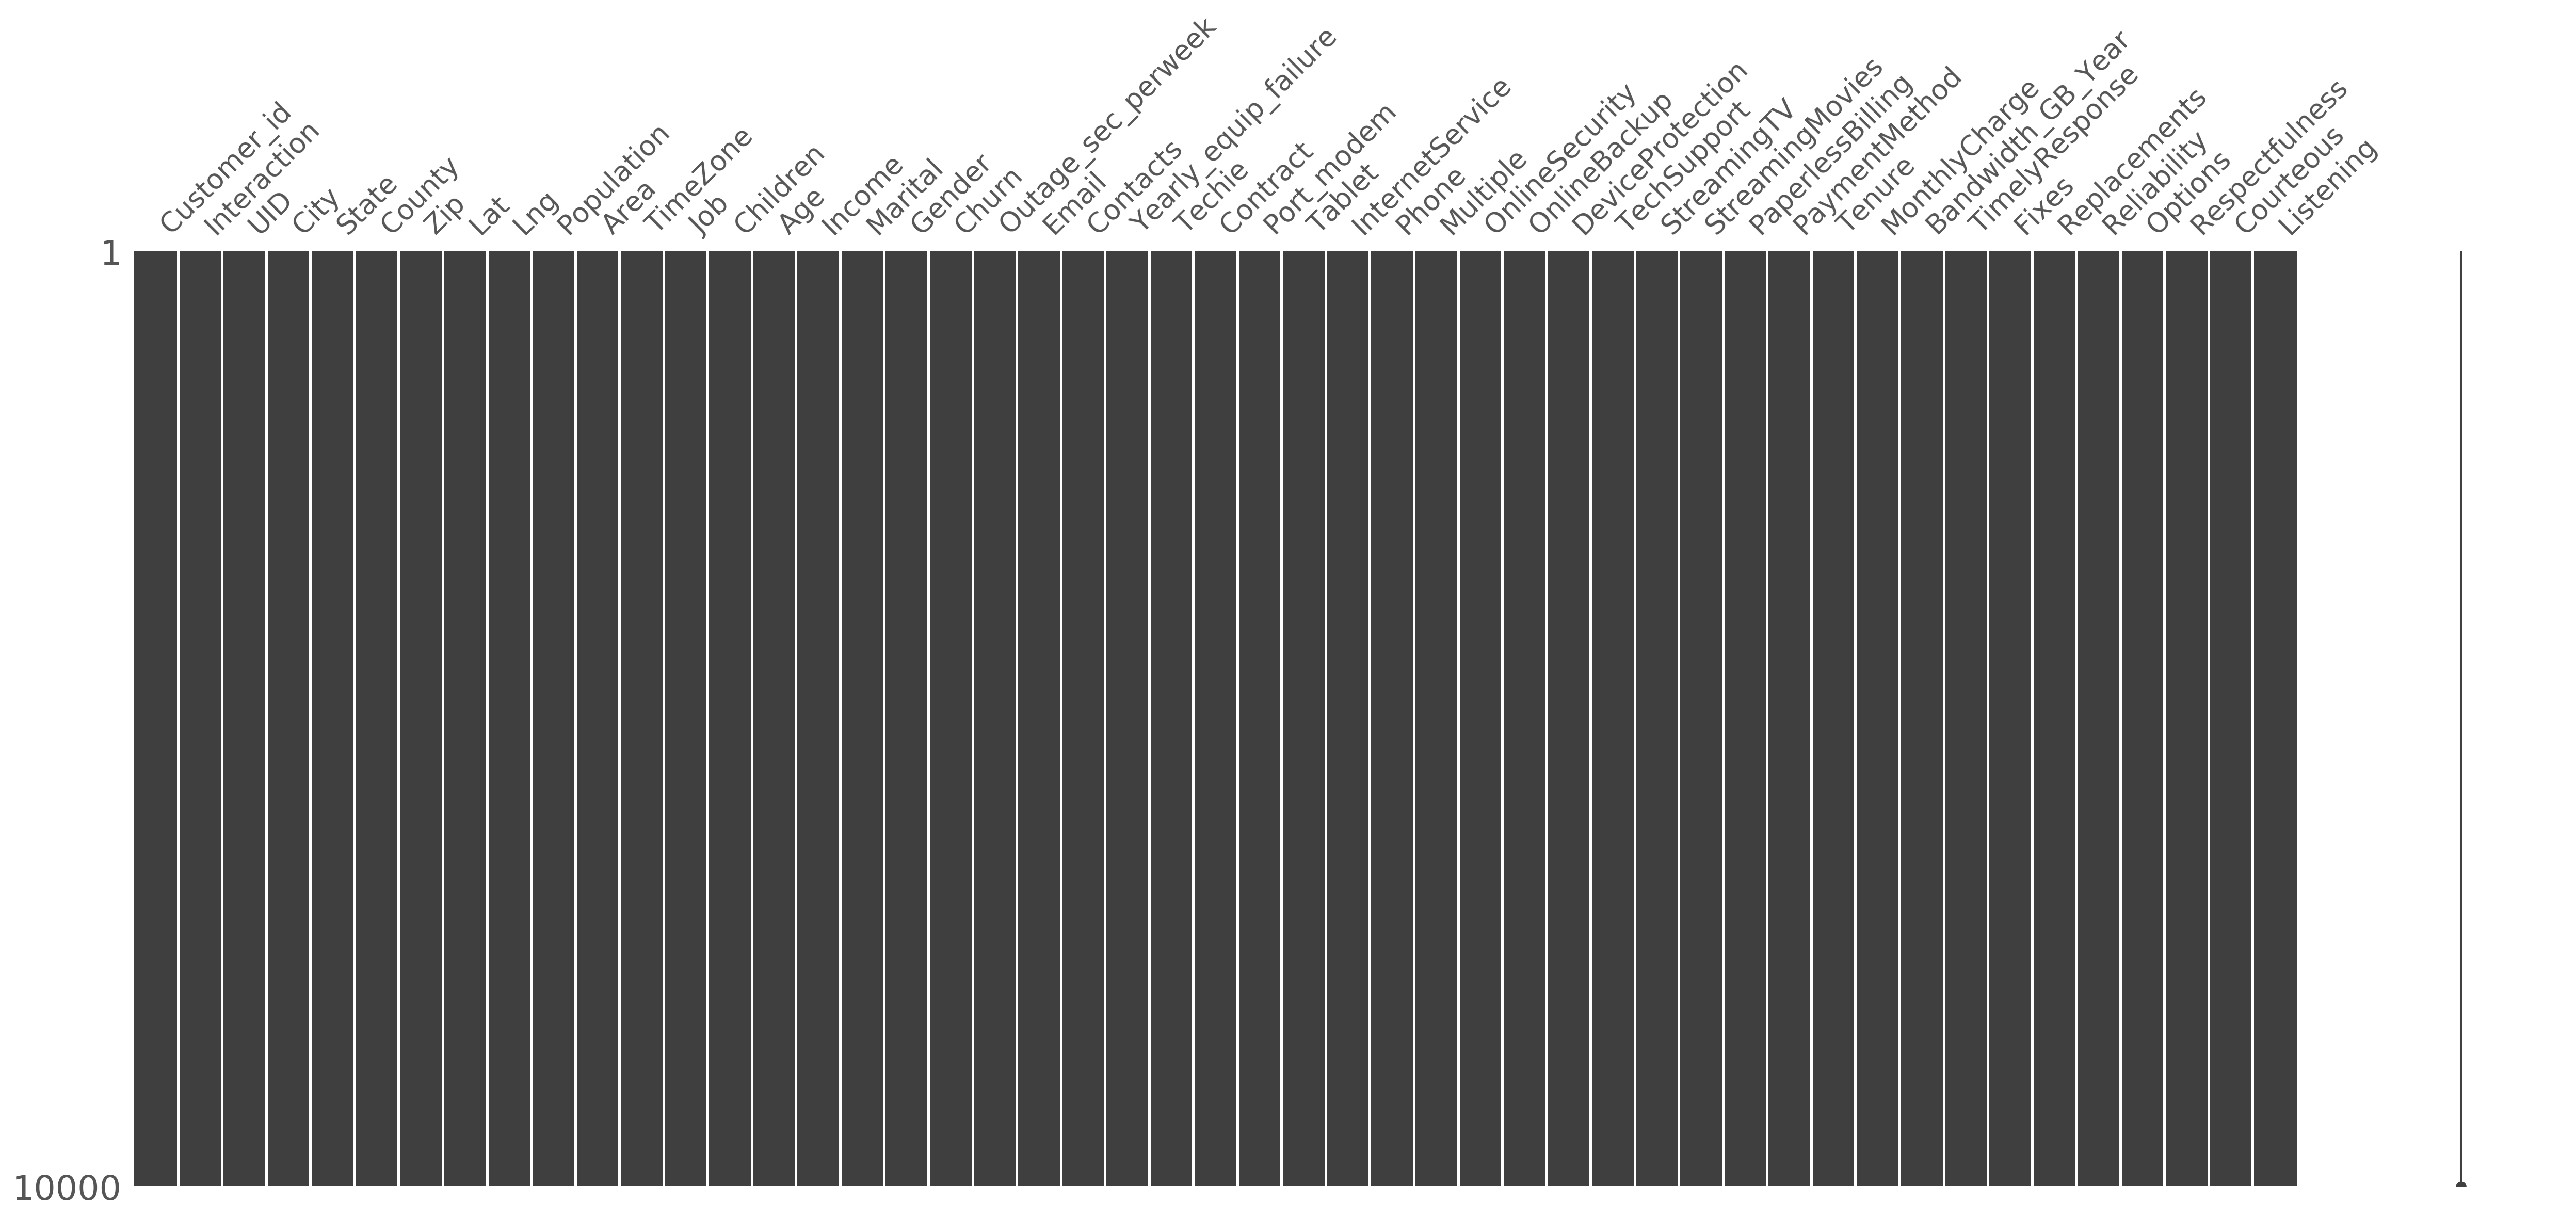

In [28]:
# Check for missing data & visualize missing values in dataset 

# Install appropriate library
!pip install missingno

# Importing the libraries
import missingno as msno

# Visualize missing values as a matrix
msno.matrix(churn_df);
"""(GeeksForGeeks, p. 1)"""

In [29]:
# Encode binary categorical variables with dummies
churn_df['DummyGender'] = [1 if v == 'Male' else 0 for v in churn_df['Gender']]
churn_df['DummyChurn'] = [1 if v == 'Yes' else 0 for v in churn_df['Churn']] ### If the customer left (churned) they get a '1'
churn_df['DummyTechie'] = [1 if v == 'Yes' else 0 for v in churn_df['Techie']]
churn_df['DummyContract'] = [1 if v == 'Two Year' else 0 for v in churn_df['Contract']]
churn_df['DummyPort_modem'] = [1 if v == 'Yes' else 0 for v in churn_df['Port_modem']]
churn_df['DummyTablet'] = [1 if v == 'Yes' else 0 for v in churn_df['Tablet']]
churn_df['DummyInternetService'] = [1 if v == 'Fiber Optic' else 0 for v in churn_df['InternetService']]
churn_df['DummyPhone'] = [1 if v == 'Yes' else 0 for v in churn_df['Phone']]
churn_df['DummyMultiple'] = [1 if v == 'Yes' else 0 for v in churn_df['Multiple']]
churn_df['DummyOnlineSecurity'] = [1 if v == 'Yes' else 0 for v in churn_df['OnlineSecurity']]
churn_df['DummyOnlineBackup'] = [1 if v == 'Yes' else 0 for v in churn_df['OnlineBackup']]
churn_df['DummyDeviceProtection'] = [1 if v == 'Yes' else 0 for v in churn_df['DeviceProtection']]
churn_df['DummyTechSupport'] = [1 if v == 'Yes' else 0 for v in churn_df['TechSupport']]
churn_df['DummyStreamingTV'] = [1 if v == 'Yes' else 0 for v in churn_df['StreamingTV']]
churn_df['StreamingMovies'] = [1 if v == 'Yes' else 0 for v in churn_df['StreamingMovies']]
churn_df['DummyPaperlessBilling'] = [1 if v == 'Yes' else 0 for v in churn_df['PaperlessBilling']]

In [30]:
# Drop original categorical features from dataframe
churn_df = churn_df.drop(columns=['Gender', 'Churn', 'Techie', 'Contract', 'Port_modem', 'Tablet', 
                                  'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 
                                  'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                                  'StreamingTV', 'StreamingMovies', 'PaperlessBilling'])

In [31]:
churn_df.head()

Customer_id                           Interaction  \
CaseOrder                                                     
1             K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
2             S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
3             K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
4              D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
5             K662701  68a861fd-0d20-4e51-a587-8a90407ee574   

                                        UID         City State  \
CaseOrder                                                        
1          e885b299883d4f9fb18e39c75155d990  Point Baker    AK   
2          f2de8bef964785f41a2959829830fb8a  West Branch    MI   
3          f1784cfa9f6d92ae816197eb175d3c71      Yamhill    OR   
4          dc8a365077241bb5cd5ccd305136b05e      Del Mar    CA   
5          aabb64a116e83fdc4befc1fbab1663f9    Needville    TX   

                          County    Zip       Lat        Lng  Population  ...  \
CaseOrder                                                                 ...   
1          Prince of Wales-Hyder  99927  56.25100 -133.37571          38  ...   
2                         Ogemaw  48661  44.32893  -84.24080       10446  ...   
3                        Yamhill  97148  45.35589 -123.24657        3735  ...   
4                      San Diego  92014  32.96687 -117.24798       13863  ...   
5                      Fort Bend  77461  29.38012  -95.80673       11352  ...   

          DummyTablet DummyInternetService DummyPhone  DummyMultiple  \
CaseOrder                                                              
1                   1                    1          1              0   
2                   1                    1          1              1   
3                   0                    0          1              1   
4                   0                    0          1              0   
5                   0                    1          0              0   

           DummyOnlineSecurity  DummyOnlineBackup DummyDeviceProtection  \
CaseOrder                                                                 
1                            1                  1                     0   
2                            1                  0                     0   
3                            0                  0                     0   
4                            1                  0                     0   
5                            0                  0                     0   

           DummyTechSupport  DummyStreamingTV  DummyPaperlessBilling  
CaseOrder                                                             
1                         0                 0                      1  
2                         0                 1                      1  
3                         0                 0                      1  
4                         0                 1                      1  
5                         1                 1                      0  

[5 rows x 48 columns]

In [32]:
# Remove less meaningful categorical variables from dataset to provide fully numerical dataframe for further analysis
churn_df = churn_df.drop(columns=['Customer_id', 'Interaction', 'UID', 
                            'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 
                            'Area', 'TimeZone', 'Job', 'Marital', 'PaymentMethod'])
churn_df.head()

Population  Children  Age    Income  Outage_sec_perweek  Email  \
CaseOrder                                                                   
1                  38         0   68  28561.99            7.978323     10   
2               10446         1   27  21704.77           11.699080     12   
3                3735         4   50   9609.57           10.752800      9   
4               13863         1   48  18925.23           14.913540     15   
5               11352         0   83  40074.19            8.147417     16   

           Contacts  Yearly_equip_failure     Tenure  MonthlyCharge  ...  \
CaseOrder                                                            ...   
1                 0                     1   6.795513     172.455519  ...   
2                 0                     1   1.156681     242.632554  ...   
3                 0                     1  15.754144     159.947583  ...   
4                 2                     0  17.087227     119.956840  ...   
5                 2                     1   1.670972     149.948316  ...   

           DummyTablet  DummyInternetService  DummyPhone  DummyMultiple  \
CaseOrder                                                                 
1                    1                     1           1              0   
2                    1                     1           1              1   
3                    0                     0           1              1   
4                    0                     0           1              0   
5                    0                     1           0              0   

           DummyOnlineSecurity  DummyOnlineBackup  DummyDeviceProtection  \
CaseOrder                                                                  
1                            1                  1                      0   
2                            1                  0                      0   
3                            0                  0                      0   
4                            1                  0                      0   
5                            0                  0                      0   

           DummyTechSupport  DummyStreamingTV  DummyPaperlessBilling  
CaseOrder                                                             
1                         0                 0                      1  
2                         0                 1                      1  
3                         0                 0                      1  
4                         0                 1                      1  
5                         1                 1                      0  

[5 rows x 34 columns]

In [33]:
# Move DummyChurn to end of dataset to set as target
churn_df = churn_df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
        'TimelyResponse', 'Fixes', 'Replacements',
       'Reliability', 'Options', 'Respectfulness', 'Courteous', 'Listening',
       'DummyGender', 'DummyTechie', 'DummyContract',
       'DummyPort_modem', 'DummyTablet', 'DummyInternetService', 'DummyPhone',
       'DummyMultiple', 'DummyOnlineSecurity', 'DummyOnlineBackup',
       'DummyDeviceProtection', 'DummyTechSupport', 'DummyStreamingTV',
       'DummyPaperlessBilling', 'DummyChurn',]]

churn_df.head()

Children  Age    Income  Outage_sec_perweek  Email  Contacts  \
CaseOrder                                                                 
1                 0   68  28561.99            7.978323     10         0   
2                 1   27  21704.77           11.699080     12         0   
3                 4   50   9609.57           10.752800      9         0   
4                 1   48  18925.23           14.913540     15         2   
5                 0   83  40074.19            8.147417     16         2   

           Yearly_equip_failure     Tenure  MonthlyCharge  Bandwidth_GB_Year  \
CaseOrder                                                                      
1                             1   6.795513     172.455519         904.536110   
2                             1   1.156681     242.632554         800.982766   
3                             1  15.754144     159.947583        2054.706961   
4                             0  17.087227     119.956840        2164.579412   
5                             1   1.670972     149.948316         271.493436   

           ...  DummyInternetService  DummyPhone  DummyMultiple  \
CaseOrder  ...                                                    
1          ...                     1           1              0   
2          ...                     1           1              1   
3          ...                     0           1              1   
4          ...                     0           1              0   
5          ...                     1           0              0   

           DummyOnlineSecurity  DummyOnlineBackup  DummyDeviceProtection  \
CaseOrder                                                                  
1                            1                  1                      0   
2                            1                  0                      0   
3                            0                  0                      0   
4                            1                  0                      0   
5                            0                  0                      0   

           DummyTechSupport  DummyStreamingTV  DummyPaperlessBilling  \
CaseOrder                                                              
1                         0                 0                      1   
2                         0                 1                      1   
3                         0                 0                      1   
4                         0                 1                      1   
5                         1                 1                      0   

           DummyChurn  
CaseOrder              
1                   0  
2                   1  
3                   0  
4                   0  
5                   1  

[5 rows x 33 columns]

In [34]:
# List features for analysis
features = (list(churn_df.columns[:-1]))
print('Features for analysis include: \n', features)

Features for analysis include: 
 ['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year', 'TimelyResponse', 'Fixes', 'Replacements', 'Reliability', 'Options', 'Respectfulness', 'Courteous', 'Listening', 'DummyGender', 'DummyTechie', 'DummyContract', 'DummyPort_modem', 'DummyTablet', 'DummyInternetService', 'DummyPhone', 'DummyMultiple', 'DummyOnlineSecurity', 'DummyOnlineBackup', 'DummyDeviceProtection', 'DummyTechSupport', 'DummyStreamingTV', 'DummyPaperlessBilling']


#### <span style="color:green"><b>C4. Cleaned Dataset</b>:</span>
Cleaned data set is extracted as "churn_prepared.csv."

In [35]:
# Extract Clean dataset
churn_df.to_csv('data/churn_prepared.csv')

#### <span style='color:Gold'><b>Part IV: Analysis</b></span>

In [36]:
# Re-read fully numerical prepared dataset
churn_df = pd.read_csv('data/churn_prepared.csv')

# Set predictor features & target variable
X = churn_df.drop('DummyChurn', axis=1).values
y = churn_df['DummyChurn'].values

In [37]:
# Import model, splitting method & metrics from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, train_test_split

#### <span style="color:green"><b>D1. Splitting the Data</b></span>

In [38]:
# Set seed for reproducibility
SEED = 1

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = SEED)

In [39]:
# Instantiate KNN model 
knn = KNeighborsClassifier(n_neighbors = 7)

# Fit data to KNN model
knn.fit(X_train, y_train)

# Predict outcomes from test set
y_pred = knn.predict(X_test)

#### <span style="color:green"><b>D2. Output & Intermediate Calculations</b></span>

In [40]:
# Print initial accuracy score of KNN model
print('Initial accuracy score KNN model: ', accuracy_score(y_test, y_pred))

Initial accuracy score KNN model:  0.7145


In [41]:
# Compute classification metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.81      1442
           1       0.49      0.40      0.44       558

    accuracy                           0.71      2000
   macro avg       0.63      0.62      0.62      2000
weighted avg       0.70      0.71      0.71      2000



#### <span style="color:green"><b>D3. Code Execution</b></span>

In [42]:
# Create pipeline object & scale dataframe
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Set steps for pipeline object
steps = [('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier())]

# Instantiate pipeline
pipeline = Pipeline(steps)

# Split dataframe
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X, y, test_size = 0.2, random_state = SEED)

# Scale dateframe with pipeline object
knn_scaled = pipeline.fit(X_train_scaled, y_train_scaled)

# Predict from scaled dataframe
y_pred_scaled = pipeline.predict(X_test_scaled)

In [43]:
# Print new accuracy score of scaled KNN model
print('New accuracy score of scaled KNN model: {:0.3f}'.format(accuracy_score(y_test_scaled, y_pred_scaled)))

New accuracy score of scaled KNN model: 0.790


In [44]:
# Compute classification metrics after scaling
print(classification_report(y_test_scaled, y_pred_scaled))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1442
           1       0.64      0.56      0.60       558

    accuracy                           0.79      2000
   macro avg       0.74      0.72      0.73      2000
weighted avg       0.78      0.79      0.79      2000



In [45]:
# Import sklearn confusion_matrix & generate results
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

[[1204  238]
 [ 333  225]]


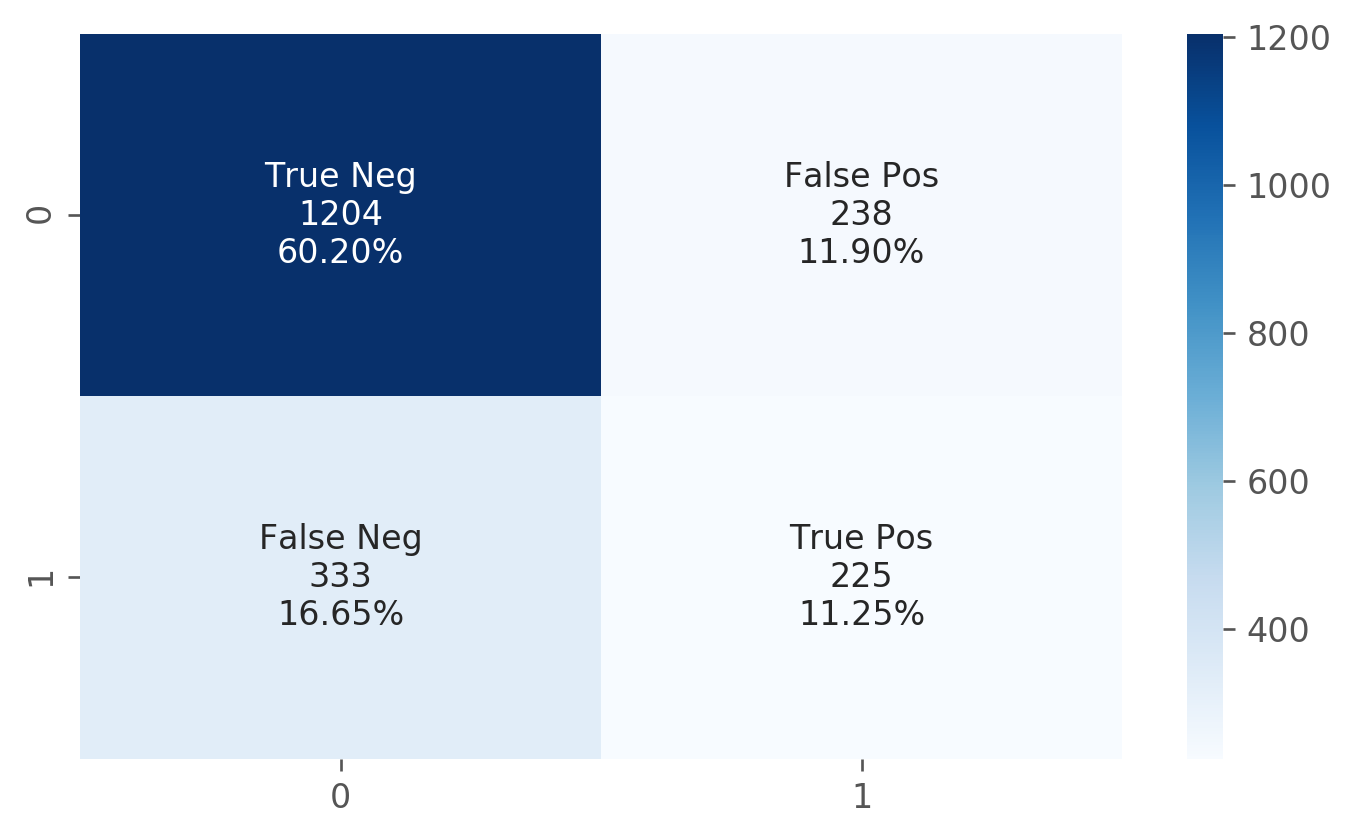

In [46]:
# Create a visually more intuitive confusion matrix
"""(Dennis, pg. 1)"""
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

#### <span style="color:green"><b>E1. Accuracy & AUC</b></span>

#### Model Comparison
It appears that scaling improved model performance from an <b>Accuracy</b> of 0.71 to 0.79 & <b>Precision</b> of 0.78 to 0.84. The area under the curve is a decent score at 0.7959.

In [47]:
# Import GridSearchCV for cross validation of model
from sklearn.model_selection import GridSearchCV

# Set up parameters grid
param_grid = {'n_neighbors': np.arange(1, 50)}

# Re-intantiate KNN for cross validation
knn = KNeighborsClassifier()

# Instantiate GridSearch cross validation
knn_cv = GridSearchCV(knn , param_grid, cv=5)

# Fit model to 
knn_cv.fit(X_train, y_train)

# Print best parameters
print('Best parameters for this KNN model: {}'.format(knn_cv.best_params_))

Best parameters for this KNN model: {'n_neighbors': 6}


In [48]:
# Generate model best score
print('Best score for this KNN model: {:.3f}'.format(knn_cv.best_score_))

Best score for this KNN model: 0.735


In [49]:
# Import ROC AUC metrics for explaining the area under the curve
from sklearn.metrics import roc_auc_score

# Fit it to the data
knn_cv.fit(X, y)

# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn_cv.predict_proba(X_test)[:,1]

# Compute and print AUC score
print("The Area under curve (AUC) on validation dataset is: {:.4f}".format(roc_auc_score(y_test, y_pred_prob)))

The Area under curve (AUC) on validation dataset is: 0.7959


In [50]:
# Compute cross-validated AUC scores: cv_auc
cv_auc = cross_val_score(knn_cv, X, y, cv=5, scoring='roc_auc')

# Print list of AUC scores
print("AUC scores computed using 5-fold cross-validation: {}".format(cv_auc))

AUC scores computed using 5-fold cross-validation: [0.68120909 0.17406045 0.96370684 0.96560711 0.58834745]


#### <span style="color:green"><b>E2. Results & Implications</b></span>

#### <span style="color:green"><b>E3. Limitation</b></span>
"When using the k-nearest neighbors algorithm you have the ability to change k, potentially yielding dramatically different results. You choose the value of <b><i>k</i></b> by trying different values and testing the prediction capabilities of the model. This means you must develop, validate, and test several models" <span style="color:orange">(Grant, pg. 1).</span>
<br>What this means to our analysis here is that the relatively arbitrary choice of <b><i>k</i></b> = 7 nearest neighbors might yield dramatically different results if we chose a different <b><i>k</i></b> number of neighbors.  As discovered in our cross validation grid search, perhaps it should be the 6 nearest neighbors.
Also, it appears to be memory intensive & computationally expensive.  Therefore, simply, it takes a long time to compute.

#### <span style="color:green"><b>E4. Course of Action</b></span>
&emsp; It is critical that decision-makers & marketers understand that our predictor variables create a relatively low accuracy score with the results of an 0.84 after scaling. &nbsp; We should analyse the features that are in common among those leaving the company & attempt to reduce their likelihood of occuring with any given customer in the future. &nbsp; This suggests that as a customer subscribes to more services that the company provided, an additional port modem or online backup for example, they are less likely to leave the company. &nbsp; Clearly, it is the best interest of retaining customers to provide them with more services & improve their experience with the company by helping customers understand all the services that are available to them as a subscriber, not simple mobile phone service. 

#### <span style="color:green"><b>F. Video</b></span>
<span style="color:red">https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=7b6d583c-02f8-47f0-9da2-ad83014c4e88</span>

#### G. Sources for Third-Party Code
* GeeksForGeeks. &ensp; (2019, July 4). &ensp; <i>Python | Visualize missing values (NaN) values using Missingno Library</i>. &ensp; GeeksForGeeks. &ensp; https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/
<br>
* Dennis, T. &ensp; (2019, July 25). &ensp; <i>Confusion Matrix Visualization</i>. &ensp; Medium. &ensp; https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

#### H. Sources 
* CBTNuggets. &ensp; (2018, September 20). &ensp; <i>Why Data Scientists Love Python</i>. &ensp; CBTNuggets. &ensp; https://www.cbtnuggets.com/blog/technology/data/why-data-scientists-love-python
<br> 
* Grant, P. &ensp; (2019, July 21). &ensp; <i>Introducing k-Nearest Neighbors</i>. &ensp; TowardDataScience. &ensp; https://towardsdatascience.com/introducing-k-nearest-neighbors-7bcd10f938c5
<br> 
* Massaron, L. & Boschetti, A. &ensp; (2016). &ensp; <i>Regression Analysis with Python</i>. &ensp; Packt Publishing.

In [ ]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('D209 Data Mining 1 - NVM2 - Classification Analysis.ipynb')